## Problem Statement
This is an entity-level sentiment analysis dataset of twitter. Given a message and an entity, the task is to judge the sentiment of the message about the entity. There are three classes in this dataset: Positive, Negative and Neutral. We regard messages that are not relevant to the entity (i.e. Irrelevant) as Neutral.

## 1.Data Collection

In [1]:
#Load data-preprocessing libraries
import pandas as pd
import numpy as np

#Text processing libraries
import re
import nltk
from nltk.corpus import stopwords  
from nltk.stem import WordNetLemmatizer

#Load data-visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns


nltk.download('stopwords')
nltk.download('wordnet')
stop_words = set(stopwords.words('english')) 

lemmatizer = WordNetLemmatizer() 

pd.pandas.set_option('display.max_columns',None)

C:\Users\Admin\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
#Load training data
df_data=pd.read_csv('twitter_training.csv',header=None)
df_data.head()

,0,1,2,3
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [3]:
#rename the columns to get a better sense of data
df_data.rename(columns= {0:'Tweet_ID',1:'Topic',2:'Sentiment',3:'Tweet'},inplace=True)
df_data.head()

,Tweet_ID,Topic,Sentiment,Tweet
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


## 2.EDA

In [4]:
#shape of data
print('Train data shape: ',df_data.shape)

Train data shape:  (74682, 4)


In [5]:
#percentage of missing data
(df_data.isnull().sum()/len(df_data))*100

Tweet_ID     0.000000
Topic        0.000000
Sentiment    0.000000
Tweet        0.918561
dtype: float64

In [6]:
#As only 0.91% of data in Tweet features are null we will drop them
df_data.dropna(axis=0,inplace=True)

In [7]:
#As only 0.91% of data in Tweet features are null we will drop them
df_data.dropna(axis=0,inplace=True)

#check percentage of missing data after dropping missing features
(df_data.isnull().sum()/len(df_data))*100

Tweet_ID     0.0
Topic        0.0
Sentiment    0.0
Tweet        0.0
dtype: float64

In [8]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73996 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Tweet_ID   73996 non-null  int64 
 1   Topic      73996 non-null  object
 2   Sentiment  73996 non-null  object
 3   Tweet      73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.8+ MB


In [9]:
print('Distinct Values: \n')
col=['Topic','Sentiment']
for i in col:
    print(i,'->')
    print(df_data[i].value_counts())
    print('\n')

Distinct Values: 

Topic ->
MaddenNFL                            2377
LeagueOfLegends                      2377
CallOfDuty                           2376
Verizon                              2365
TomClancysRainbowSix                 2364
Facebook                             2362
Microsoft                            2361
Dota2                                2359
WorldOfCraft                         2357
ApexLegends                          2353
NBA2K                                2343
CallOfDutyBlackopsColdWar            2343
FIFA                                 2324
johnson&johnson                      2324
TomClancysGhostRecon                 2321
Battlefield                          2316
Overwatch                            2316
GrandTheftAuto(GTA)                  2293
HomeDepot                            2292
PlayStation5(PS5)                    2291
Hearthstone                          2286
CS-GO                                2284
Xbox(Xseries)                        2283
Border

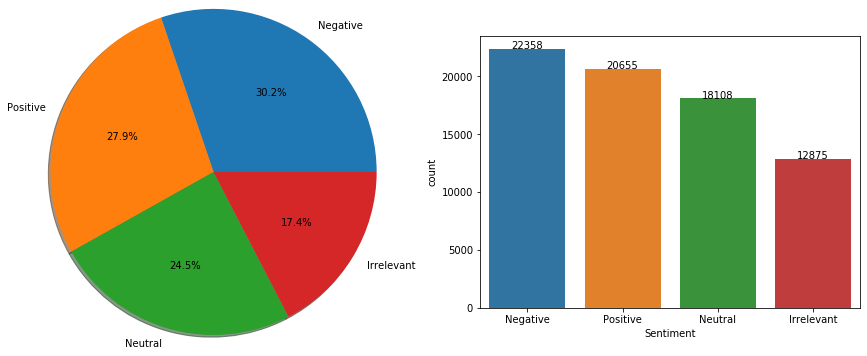

In [10]:
#Visualizing Sentiment feature - Target feature
plt.figure(figsize=(15,5))

#plot pie chart
plt.subplot(1,2,1)
label = df_data['Sentiment'].value_counts().index
label_count = df_data['Sentiment'].value_counts().values
plt.pie(data=df_data, x=label_count, labels=label, autopct='%1.1f%%', shadow=True, radius=1.5)

#plot countplot
plt.subplot(1,2,2)
ax = sns.countplot(x='Sentiment', data=df_data, order=label)
for p in ax.patches:
    height=p.get_height()
    ax.text(x=p.get_x()+(p.get_width()/2),
    y=height+0.2,ha='center',s='{:.0f}'.format(height))
plt.show()

Note:
* From the above graphs we can observe that the dataset is balanced.

In [11]:
#Get the count of words in each tweet
df_data['Tweet_word_count']=df_data['Tweet'].apply(lambda x: len(x.split()))

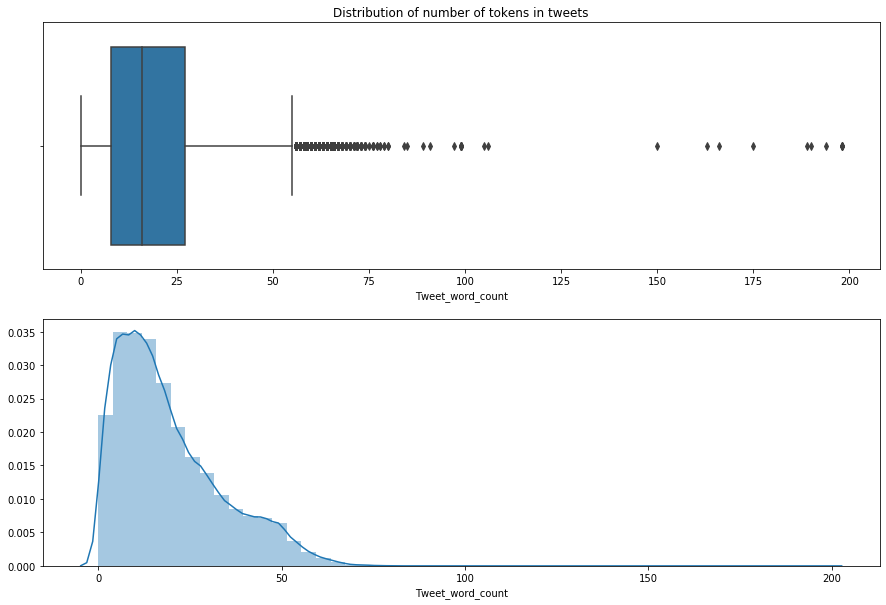

In [12]:
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
sns.boxplot(x=df_data['Tweet_word_count'])
plt.title(('Distribution of number of tokens in tweets'))

plt.subplot(2,1,2)
sns.distplot(a=df_data['Tweet_word_count'])

Note:
* The mean length of tokens is around 23.
* The distribution is positively skewed.

In [13]:
#Extreme outliers
extreme_outliers = df_data['Tweet'][df_data['Tweet_word_count']>125]

for i in extreme_outliers.index:
    print(i,'Tweet Sentiment: ',df_data['Sentiment'][i])
    print(extreme_outliers[i])
    print('\n')

1826 Tweet Sentiment:  Neutral
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _


8546 Tweet Sentiment:  Positive
I REALLY HAVE THE OVERWATCH RN GAME. SEA SEA SEA SEA SEA SEA SEA SEA SEA SEA SEA SEA SEA SEA SEA SEA SEA SEA SEA SEE E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E


10454 Tweet Sentiment:  Positive
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _

In [14]:
#Get count of characters in each tweet excluding the whitespaces
df_data['Tweet_char_count']=df_data['Tweet'].apply(lambda x: len(x)-x.count(' '))

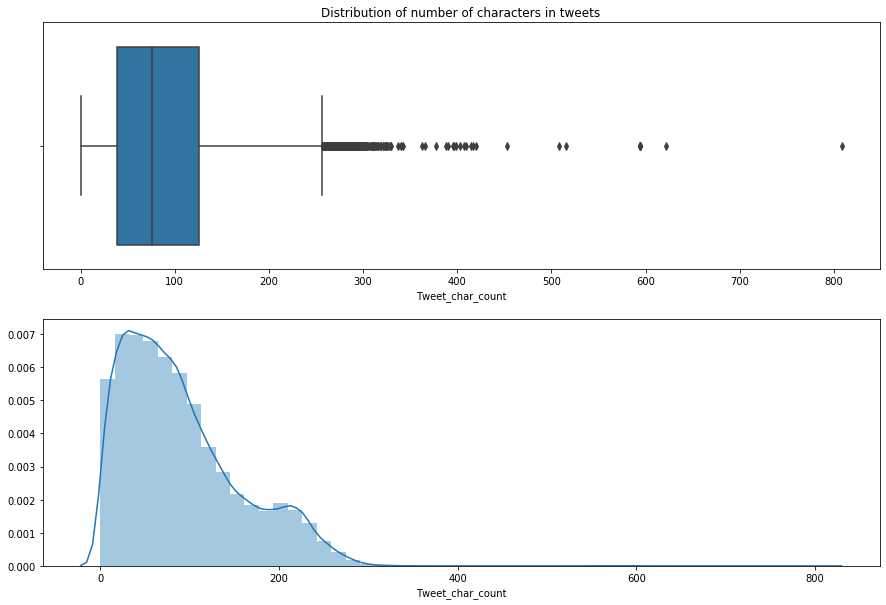

In [15]:
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
sns.boxplot(x=df_data['Tweet_char_count'])
plt.title(('Distribution of number of characters in tweets'))

plt.subplot(2,1,2)
sns.distplot(a=df_data['Tweet_char_count'])

## 3.Data Preprocessing

In [16]:
#Remove user mentions from the tweets
#'I want to join @google' will become 'I want to join'
df_data['Tweet_clean']=df_data['Tweet'].apply(lambda x: re.sub(r'@[A-Za-z0-9]+','',x))

In [17]:
#Remove hashtags from the tweets
#'My new house #goals' will become 'My new house'
df_data['Tweet_clean']=df_data['Tweet_clean'].apply(lambda x: re.sub('#','',x))

In [18]:
# make a dictionary of contractions
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",
                           "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",
                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",
                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",
                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",
                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",
                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",
                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",
                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",
                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",
                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",
                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",
                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",
                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",
                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
                           "you're": "you are", "you've": "you have"}

In [19]:
#Remove contractions
df_data['Tweet_clean']=df_data['Tweet_clean'].apply(lambda x: ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in x.split(" ")]))

In [20]:
#Remove links/urls from the tweets
df_data['Tweet_clean']=df_data['Tweet_clean'].apply(lambda x: re.sub(r'http\S+','',x))

In [21]:
def txt_conversion(sentence):
    #Getting only the letters from the tweets
    sentence=re.sub(r'[^a-zA-Z ]','',sentence)
    #Converting them to lowercase
    sentence=sentence.lower()
    #split based on space to remove multiple spaces
    words=sentence.split()
    #combining to form sentence
    return (" ".join(words)).strip()

In [22]:
df_data['Tweet_clean']=df_data['Tweet_clean'].apply(lambda x: txt_conversion(x))

In [23]:
#Removing stop-words and cpnverting words to lemma
#Stop words are the most commonly used words in a language (such as “the”, “a”, “an”, “in”)
#Example After lemmatization words like multiplication, multiplicative will become multiple
def stop_wrds_lemma_convert(sentence):
    tokens = [w for w in sentence.split() if not w in stop_words] #stopwords removal
    newString=''
    for i in tokens:                                                 
        newString=newString+lemmatizer.lemmatize(i)+' '    #converting words to lemma                               
    return newString.strip()  

In [24]:
df_data['Tweet_clean']=df_data['Tweet_clean'].apply(lambda x: stop_wrds_lemma_convert(x))

In [25]:
#earlier we had noticed that there are few tweets with just symbols. They must have got converted to whitespaces now
df_data.dropna(inplace=True)

In [26]:
df_data[df_data['Sentiment']=='Irrelevant'].head()

,Tweet_ID,Topic,Sentiment,Tweet,Tweet_word_count,Tweet_char_count,Tweet_clean
102,2418,Borderlands,Irrelevant,Appreciate the (sonic) concepts / praxis Valen...,34,229,appreciate sonic concept praxis valenzuela lan...
103,2418,Borderlands,Irrelevant,Appreciate the (sound) concepts / practices th...,31,230,appreciate sound concept practice valenzuela l...
104,2418,Borderlands,Irrelevant,Evaluate the (sound) concepts / concepts of Va...,31,191,evaluate sound concept concept valensela landa...
105,2418,Borderlands,Irrelevant,Appreciate the (sonic) concepts / praxis Valen...,32,230,appreciate sonic concept praxis valenzuela mor...
106,2418,Borderlands,Irrelevant,Appreciate by the ( sonic ) electronic concept...,46,299,appreciate sonic electronic concept praxis val...


In [27]:
#one-hot Topic feature
oh_topic=pd.get_dummies(df_data['Topic'],drop_first=True)

df_data=pd.concat([df_data,oh_topic],axis=1)

In [28]:
#map target feature
df_data['Sentiment']=df_data['Sentiment'].map({'Negative':-1,'Positive':1,'Neutral':0,'Irrelevant':0})

In [29]:
#drop columns that are not required
df_data.drop(['Tweet_ID','Tweet','Topic'],axis=1,inplace=True)

## Save the cleaned dataset

In [30]:
df_data.to_csv('Twitter_cleaned.csv')